In [1]:
import os, sys

In [2]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d:\My_toolkits\Python\Python 3.9.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sys.path.append('../../')
from models import Pix2PixGanGenerator, Pix2PixGanDiscriminator, Pix2PixGanTrainer, AnimeDataset

In [4]:
import importlib
importlib.reload(sys.modules['models'])

<module 'models' from 'd:\\Entertainment\\HCMUT\\IAS_lab\\research\\gans-collection\\notebooks\\pix2pix\\../..\\models\\__init__.py'>

In [5]:
BATCH_SIZE = 32
IM_SHAPE = (3,256,256)
EPOCHS = 100

In [6]:
train_dataset = AnimeDataset('../../data/AnimeData/train/')
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

val_dataset = AnimeDataset('../../data/AnimeData/val/')
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=2)

In [7]:
len(train_dataset)

14224

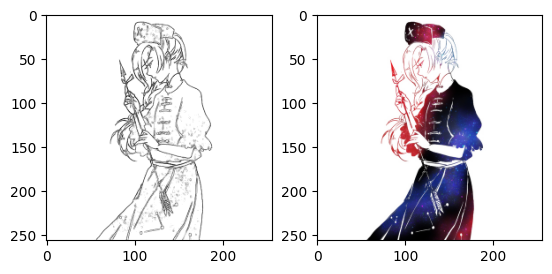

In [8]:
for inp, tar in loader:
    inp = inp[0].detach().cpu().numpy().transpose((1,2,0))
    tar = tar[0].detach().cpu().numpy().transpose((1,2,0))

    fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1)
    ax1.imshow(inp)
    ax2.imshow(tar)

    plt.show()
    break

In [ ]:
generator = Pix2PixGanGenerator(IM_SHAPE).to(device)
discriminator =  Pix2PixGanDiscriminator(IM_SHAPE).to(device)
Pix2PixGanTrainer(100, generator, discriminator, train_loader, val_loader, save_fig_dir='figs', device)